In [37]:
import numpy as np
import pandas as pd
import openpyxl
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.metrics import r2_score
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder


In [35]:
df = pd.read_excel("sampled_5per_data.xlsx")

print(df.head())
df.dtypes

   Unnamed: 0    Age_Group Gender        Race          Ethnicity  \
0           0  70 or Older      M       White  Not Span/Hispanic   
1           1      0 to 17      M       White  Not Span/Hispanic   
2           2      0 to 17      F       White  Not Span/Hispanic   
3           3      0 to 17      F  Other Race   Spanish/Hispanic   
4           4  70 or Older      M       White  Not Span/Hispanic   

  Type_Of_Admission                              Diagnosis_Description  \
0         Emergency           PERIPHERAL AND VISCERAL VASCULAR DISEASE   
1         Emergency          HEMOLYTIC JAUNDICE AND PERINATAL JAUNDICE   
2          Elective                              VESICOURETERAL REFLUX   
3           Newborn                                           LIVEBORN   
4          Elective  OCCLUSION OR STENOSIS OF PRECEREBRAL OR CEREBR...   

                               Procedure_Description  \
0  ANGIOPLASTY AND RELATED VESSEL PROCEDURES (END...   
1                                 

Unnamed: 0                              int64
Age_Group                              object
Gender                                 object
Race                                   object
Ethnicity                              object
Type_Of_Admission                      object
Diagnosis_Description                  object
Procedure_Description                  object
APR_DRG_Description                    object
APR_MDC_Description                    object
APR_Severity_Of_Illness_Description    object
APR_Risk_Of_Mortality                  object
APR_Medical_Surgical_Description       object
Payment_Typology_1                     object
Is_Emergency_Department_Indicator        bool
Length_Of_Stay                          int64
dtype: object

In [48]:
ohe = OneHotEncoder(sparse_output=False).set_output(transform='pandas')
print(ohe)

OneHotEncoder(sparse_output=False)


In [54]:
ohsetransform = ohe.fit_transform(df[["Age_Group", "Gender", 'Race', 'Ethnicity', 'Type_Of_Admission', 'APR_DRG_Description', 'APR_MDC_Description', 'APR_Severity_Of_Illness_Description','APR_Risk_Of_Mortality', 'APR_Medical_Surgical_Description', 'Payment_Typology_1','Is_Emergency_Department_Indicator']])
ohsetransform.head()

df2 = pd.concat([df["Length_Of_Stay"], ohsetransform], axis = 1)
df2.head()

,Length_Of_Stay,Age_Group_0 to 17,Age_Group_18 to 29,Age_Group_30 to 49,Age_Group_50 to 69,Age_Group_70 or Older,Gender_F,Gender_M,Gender_U,Race_Black/African American,...,Payment_Typology_1_Department of Corrections,Payment_Typology_1_Federal/State/Local/VA,"Payment_Typology_1_Managed Care, Unspecified",Payment_Typology_1_Medicaid,Payment_Typology_1_Medicare,Payment_Typology_1_Miscellaneous/Other,Payment_Typology_1_Private Health Insurance,Payment_Typology_1_Self-Pay,Is_Emergency_Department_Indicator_False,Is_Emergency_Department_Indicator_True
0,1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [56]:
# Assuming df2 is your dataframe with the dependent variable Length_Of_Stay and independent variables/features
X = df2.drop('Length_Of_Stay', axis=1)
y = df2['Length_Of_Stay']



# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Length_Of_Stay   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.414
Method:                 Least Squares   F-statistic:                     88.08
Date:                Tue, 02 Apr 2024   Prob (F-statistic):               0.00
Time:                        18:04:41   Log-Likelihood:            -1.1983e+05
No. Observations:               37192   AIC:                         2.403e+05
Df Residuals:                   36889   BIC:                         2.429e+05
Df Model:                         302                                         
Covariance Type:            nonrobust                                         
                                                                                                                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------

In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Calculate VIF for each independent variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)


                                        Variable           VIF
0                              Age_Group_0 to 17  1.715608e+06
1                             Age_Group_18 to 29  6.978305e+06
2                             Age_Group_30 to 49  6.748362e+05
3                             Age_Group_50 to 69  6.528943e+07
4                          Age_Group_70 or Older  4.222148e+07
..                                           ...           ...
313       Payment_Typology_1_Miscellaneous/Other  2.081772e+07
314  Payment_Typology_1_Private Health Insurance  4.494947e+06
315                  Payment_Typology_1_Self-Pay  2.801781e+07
316      Is_Emergency_Department_Indicator_False  4.094762e+05
317       Is_Emergency_Department_Indicator_True  2.617475e+06

[318 rows x 2 columns]


In [74]:
high_vif_vars = vif_data[vif_data['VIF'] > 40000000000]['Variable'].tolist()
print(high_vif_vars)

['Ethnicity_Multi-ethnic', 'Type_Of_Admission_Not Available']


Explained variance ratio: [0.1545616  0.0847795  0.06945158 0.0590154  0.05113231 0.04415883
 0.04115418 0.03410673 0.03314016 0.03278283 0.02660321 0.02512023
 0.02256273 0.01867843 0.01778689 0.01737814 0.01636987 0.0155427
 0.01351876 0.01253041 0.0118785  0.01113863 0.01013596 0.00965241
 0.00876929 0.00833    0.00739471 0.0061107  0.00542528 0.00481253
 0.0047005  0.00455135 0.00381168 0.00356858 0.00309808 0.00293806
 0.00278863 0.00267805 0.00249143 0.00219885 0.00192975 0.00175681
 0.00174019 0.00166137 0.00163402 0.00158879 0.00157471 0.0014987
 0.00145294 0.00135467 0.00132612 0.00121368 0.00119008 0.00116644
 0.0011177  0.00109981 0.00107721 0.00105391 0.00104363 0.00103535
 0.00101787 0.00098562 0.00094616 0.00091819 0.00090707 0.00089328
 0.00087842 0.00087249 0.00087149 0.00085543 0.00085221 0.0008349
 0.00079498 0.00077481 0.00075314 0.00073281 0.00070777 0.00070387
 0.00069073 0.00067587]
Cumulative explained variance ratio: [0.1545616  0.23934111 0.30879269 0.36780809 

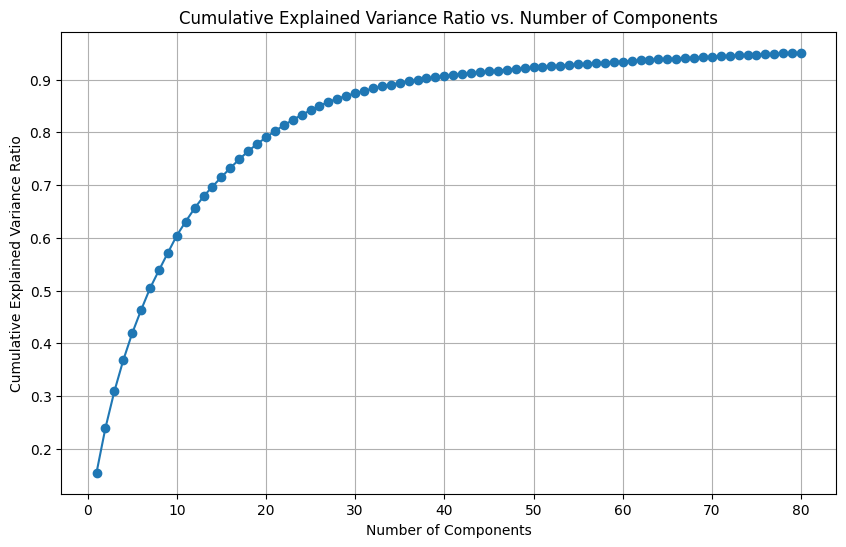

In [83]:
from sklearn.decomposition import PCA
# Initialize PCA with the desired number of components
n_components = 80  # Adjust as needed
pca = PCA(n_components=n_components)

# Fit PCA to the scaled data
X_pca = pca.fit_transform(X)

# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print('Explained variance ratio:', explained_variance_ratio)

# Get the cumulative explained variance ratio
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)
print('Cumulative explained variance ratio:', cumulative_explained_variance_ratio)

# Visualize the cumulative explained variance ratio
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, n_components + 1), cumulative_explained_variance_ratio, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio vs. Number of Components')
plt.grid(True)
plt.show()

In [107]:
# Perform PCA on training data
n_components = 70  # Adjust as needed
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

In [108]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score



# Initialize and fit linear regression model with PCA components
model = LinearRegression()
model.fit(X_pca, y)

# Make predictions on the training data
y_pred_train = model.predict(X_pca)

# Calculate R-squared for the training data
r_squared_train = r2_score(y, y_pred_train)
print('Training R-squared:', r_squared_train)

Training R-squared: 0.30429657218400297
